In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_olist = pd.read_csv('./dataset/df_olist_clean.csv')

In [3]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114085 entries, 0 to 114084
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    114085 non-null  object 
 1   customer_unique_id             114085 non-null  object 
 2   customer_city                  114085 non-null  object 
 3   customer_state                 114085 non-null  object 
 4   order_id                       114085 non-null  object 
 5   order_status                   114085 non-null  object 
 6   order_purchase_timestamp       114085 non-null  object 
 7   order_approved_at              114085 non-null  object 
 8   order_delivered_customer_date  114085 non-null  object 
 9   order_estimated_delivery_date  114085 non-null  object 
 10  order_item_id                  114085 non-null  float64
 11  product_id                     114085 non-null  object 
 12  seller_id                     

#### **4. Exploratory Data Analysis (EDA)**

we will do an exploratory Data Analysis on the Brazilian eCommerce dataset to gain more insight for business problem. There are some important questions to consider. These questions are divided into various categories to ensure a comprehensive analysis of customer behavior, purchase patterns, and other relevant aspects that can provide actionable insights for business purposes.

##### **4.1. Customers Distribution Based on Purchases Frequency**

    4.1.1 First-time Vs Repeat Customers Distribution

first-time customer is the customer who only make 1 order purchasement during period of 2016 to 2018

In [4]:
# Group by 'customer_unique_id' and count distinct 'order_id'
customer_order_counts = df_olist.groupby('customer_unique_id')['order_id'].nunique()

first_customers_ids = customer_order_counts[customer_order_counts == 1].index

repeat_customers_ids = customer_order_counts[customer_order_counts > 1].index

first_customers = df_olist[df_olist['customer_unique_id'].isin(first_customers_ids)]

repeat_customers = df_olist[df_olist['customer_unique_id'].isin(repeat_customers_ids)]

,Customer Type,Count
0,First-Time Customers,89356
1,Repeat Customers,2742


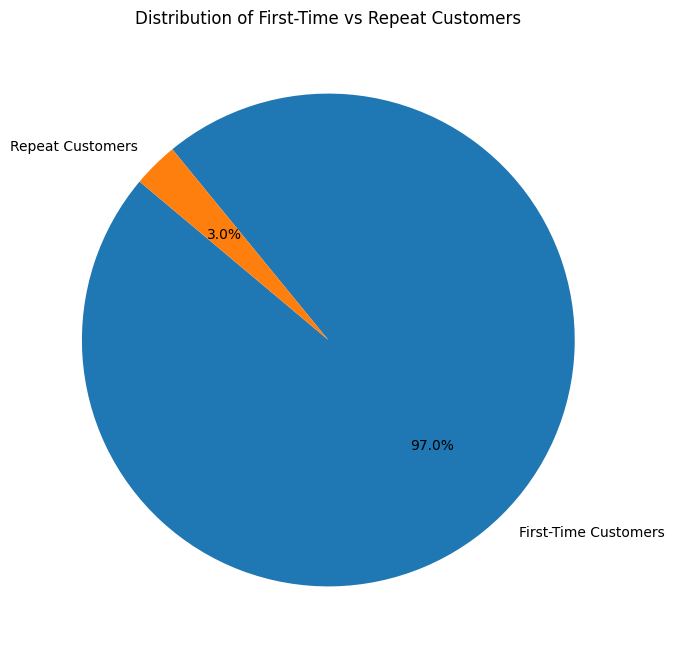

In [5]:
first_customers_count = first_customers['customer_unique_id'].nunique()
repeat_customers_count = repeat_customers['customer_unique_id'].nunique()

data = {
    'Customer Type': ['First-Time Customers', 'Repeat Customers'],
    'Count': [first_customers_count, repeat_customers_count]
}

first_and_repeat_customers = pd.DataFrame(data)

display(first_and_repeat_customers)

plt.figure(figsize=(8, 8))
plt.pie(first_and_repeat_customers['Count'], labels=first_and_repeat_customers['Customer Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of First-Time vs Repeat Customers')
plt.show()



    4.1.2 First-time Customers Single Items Vs Multiple Items

In [6]:
customer_items_counts = first_customers.groupby('customer_unique_id')['order_id'].count()

single_item_ids = customer_items_counts[customer_items_counts == 1].index
multiple_item_ids = customer_items_counts[customer_items_counts > 1].index

single_item_customers = first_customers[first_customers['customer_unique_id'].isin(single_item_ids)]

multi_item_customers = first_customers[first_customers['customer_unique_id'].isin(multiple_item_ids)]


,Customer Type,Count
0,Single Item Purchase,78220
1,Multi Item Purchase,11136


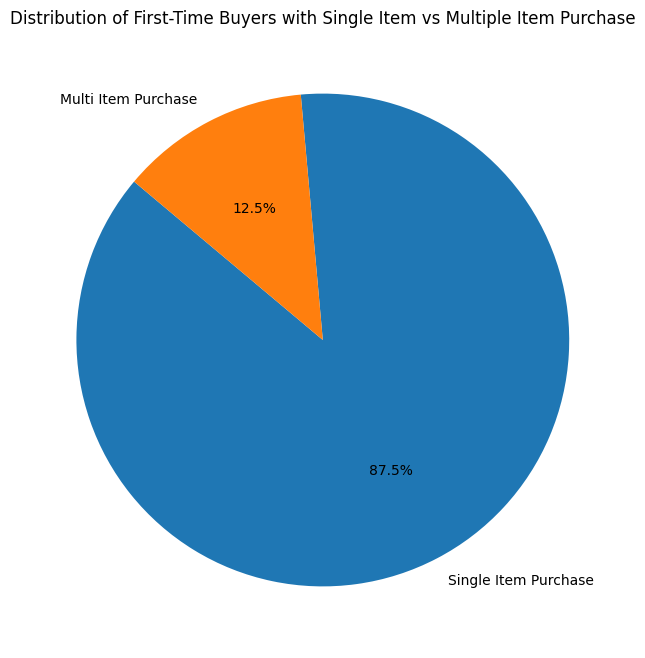

In [7]:
single_item_customers_count = single_item_customers['customer_unique_id'].nunique()
multi_item_customers_count = multi_item_customers ['customer_unique_id'].nunique()

data = {
    'Customer Type': ['Single Item Purchase', 'Multi Item Purchase'],
    'Count': [single_item_customers_count, multi_item_customers_count]
}

single_and_multiple = pd.DataFrame(data)

display(single_and_multiple)

plt.figure(figsize=(8, 8))
plt.pie(single_and_multiple ['Count'], labels=single_and_multiple ['Customer Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of First-Time Buyers with Single Item vs Multiple Item Purchase')
plt.show()

##### **4.2. Customer Purchase Frequency Based On Product Category** 


This analysis aims to calculate the frequency of purchases for different product categories. The goal is to understand how often customers buy products within each category and to identify any patterns or trends related to product preferences, category popularity, or potential market demand.

    4.2.1 First-Buyers Purchase Frequency Based On Product Category

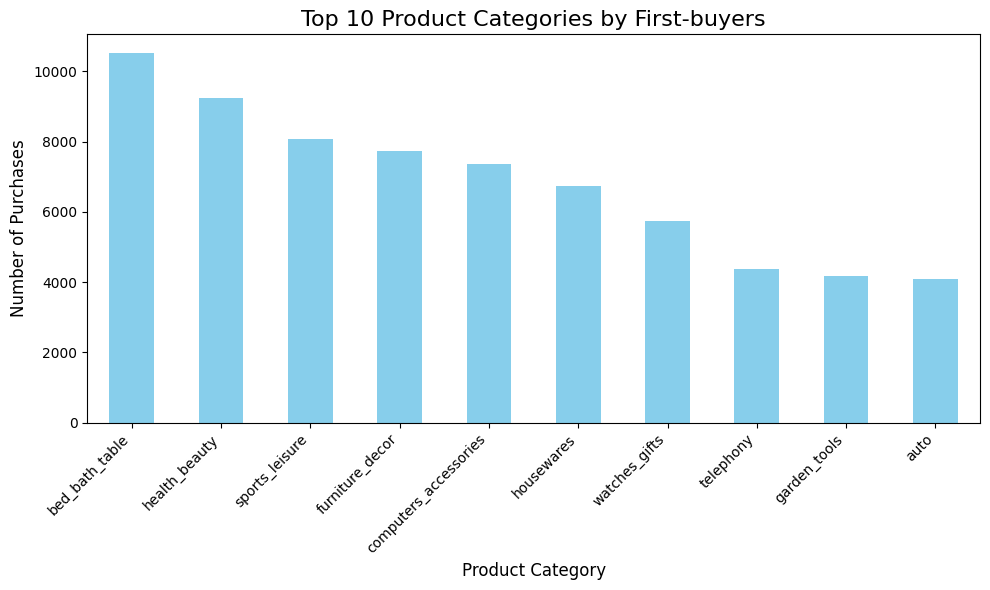

In [8]:
top_10_categories = first_customers['product_category_name'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
top_10_categories.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Top 10 Product Categories by First-buyers', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Memutar label pada sumbu x agar tidak tumpang tindih

# Menampilkan grafik
plt.tight_layout()  # Menyesuaikan padding agar label tidak terpotong
plt.show()


    4.2.2 Repeat-Buyers Purchase Frequency Based On Product Category

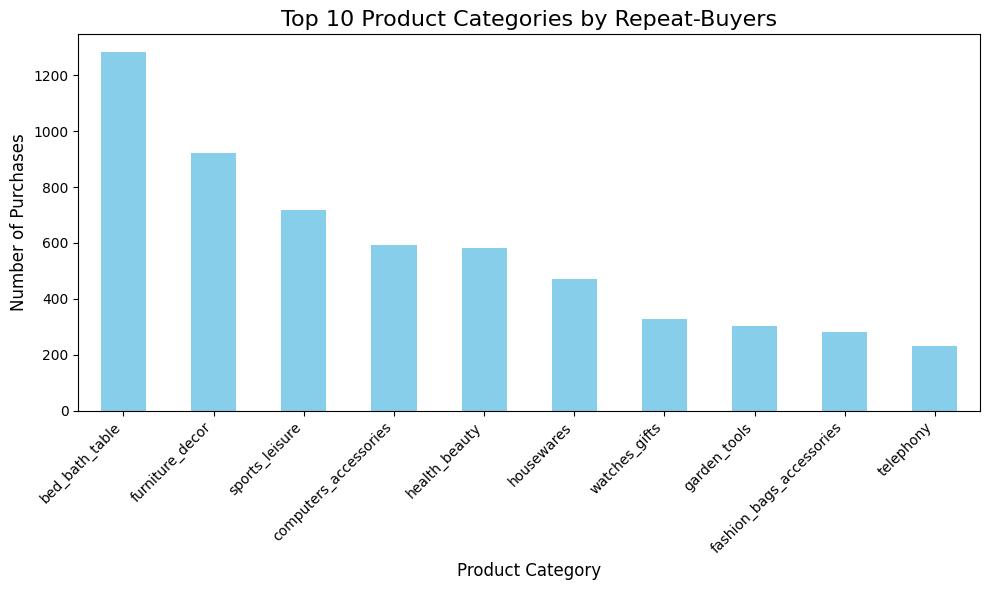

In [9]:
top_10_categories = repeat_customers['product_category_name'].value_counts().head(10)

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
top_10_categories.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
plt.title('Top 10 Product Categories by Repeat-Buyers', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Memutar label pada sumbu x agar tidak tumpang tindih

# Menampilkan grafik
plt.tight_layout()  # Menyesuaikan padding agar label tidak terpotong
plt.show()

Summary Between 4.1.1 & 4.1.2 :
- The behaviour of first-time buyers and repeat-buyers is almost the same based on product categoriy preferences.

- There are 5 top category that prefered from both type of customers which is bed_bath_table, furniture_decor, sports_leisur, computer_accessories, and health_beauty.

- There is some unique behaviour where the health_beauty takes the second place for the first-time buyers while in the repeat-buyers it takes on fifth place. Which means more buyers who bought for first time are most interest to health_beauty for their first purchasement.

- This insight could be valuable for business marketing strategies.

    4.2.3. First-Buyers Multiple Item Based on Similar Category

In [10]:
multi_categories_count = multi_item_customers.groupby('customer_unique_id')['product_category_name'].nunique()

single_categories_ids = multi_categories_count[multi_categories_count == 1].index

multi_categories_ids = multi_categories_count[multi_categories_count > 1].index

single_categories =  multi_item_customers[multi_item_customers['customer_unique_id'].isin(single_categories_ids)]

multi_categories =  multi_item_customers[multi_item_customers['customer_unique_id'].isin(multi_categories_ids)]

single_counts = single_categories['customer_unique_id'].nunique()

multi_counts  = multi_categories['customer_unique_id'].nunique()


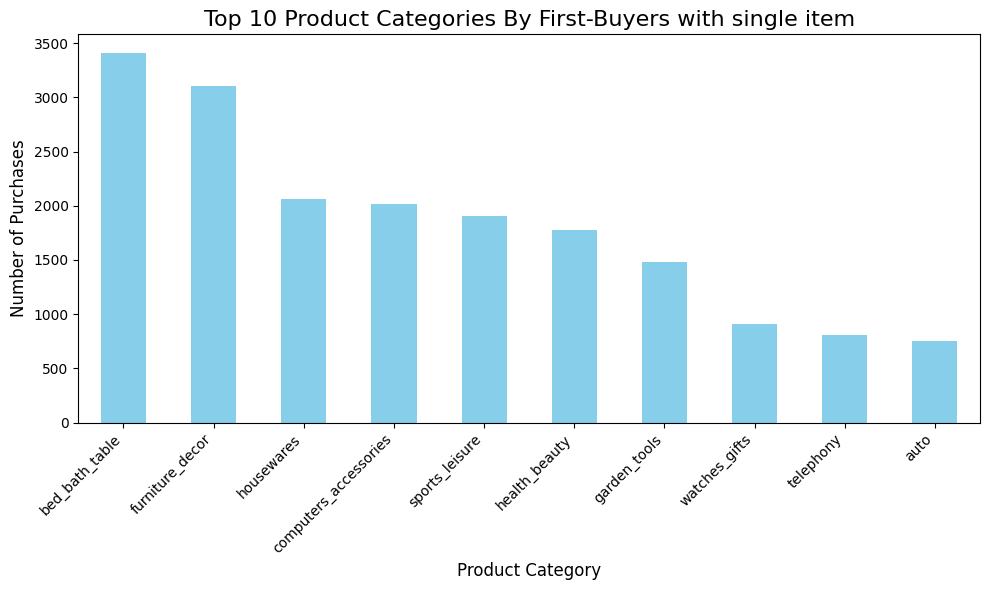

In [11]:
top_10_categories_first = single_categories['product_category_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_categories_first.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories By First-Buyers with single item', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

    4.2.4. First-Buyers Multiple Item Based on Different Category

In [12]:
multi_categories.groupby('customer_unique_id')['product_category_name'].value_counts().reset_index().sort_values(by='count', ascending=False).head(4)

,customer_unique_id,product_category_name,count
1088,db1af3fd6b23ac3873ef02619d548f9c,luggage_accessories,12
1087,db1af3fd6b23ac3873ef02619d548f9c,computers_accessories,12
463,5e33331e26d0a4e1f3fe84b3f9c5549b,bed_bath_table,8
808,a3531b78e25e6948ff198a441c30b8eb,health_beauty,6


,Purchasement Type,Count
0,Single Categories,10502
1,Multiple categories,634


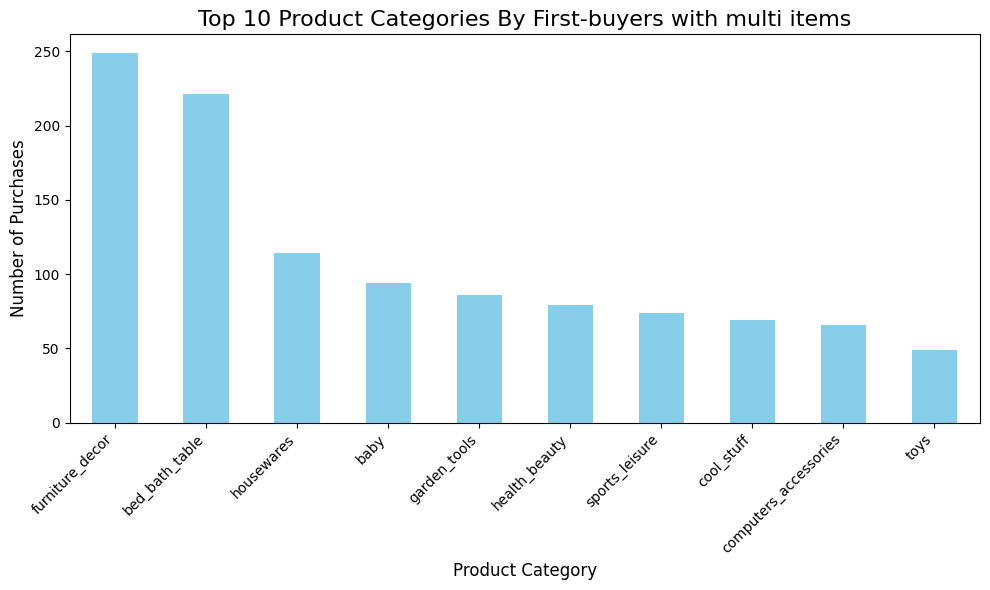

In [13]:
data = {
    'Purchasement Type': ['Single Categories', 'Multiple categories'],
    'Count': [single_counts, multi_counts]
}

single_and_multiple = pd.DataFrame(data)

display(single_and_multiple)

top_10_categories_first = multi_categories['product_category_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_categories_first.plot(kind='bar', color='skyblue')
plt.title('Top 10 Product Categories By First-buyers with multi items', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

- A total of 10,052 customers who made their first purchase bought more than one quantity but with the same product category.

- A total of 634 customers who made their first purchase bought more than one quantity with different product categories.

- The 5 product categories that are most frequently purchased together in a single transaction are furniture_decor, bed_bath_table, housewares, baby, and garden_tools. It is evident that most buyers have similarities, primarily related to household and home necessities.

- It can be concluded that the majority of buyers who purchase multiple categories are customers who are already established in a household.

##### **4.3. Customer Purchase Frequency Based On Customer City**

This analysis aims to calculate the frequency of purchases made by customers based on their city. The goal is to explore how purchase frequency varies across different cities and to identify any patterns or correlations related to customer behavior, regional preferences, or other influencing factors.

    4.3.1 First-Buyers Purchase Frequency By Customer City

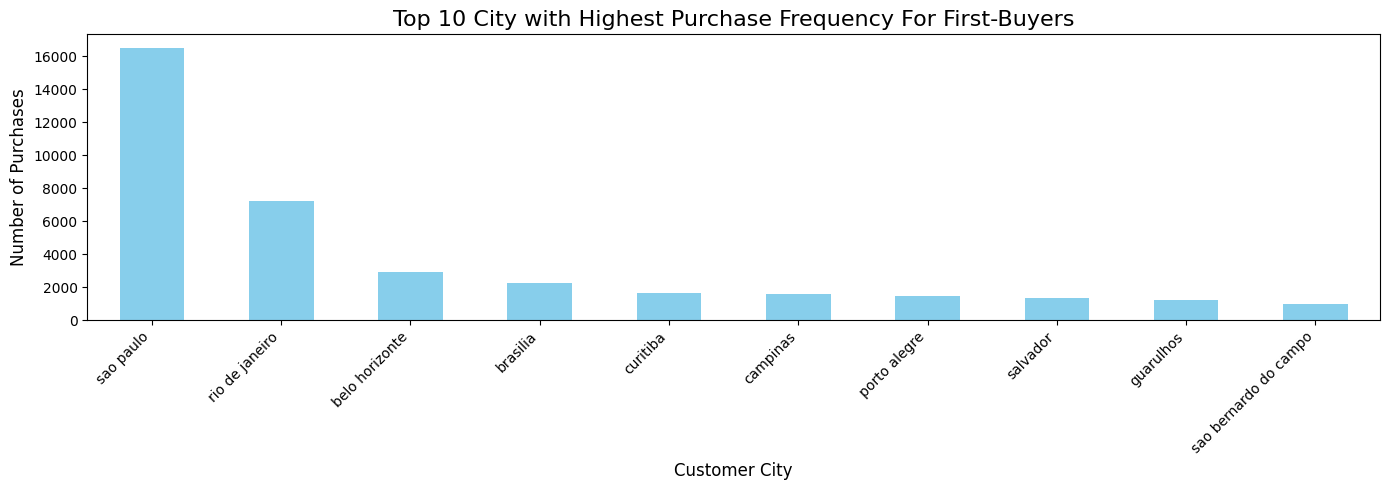

In [14]:
first_purchase_by_city = first_customers['customer_city'].value_counts().head(10)

plt.figure(figsize=(14, 5))
first_purchase_by_city.plot(kind='bar', color='skyblue')

plt.title('Top 10 City with Highest Purchase Frequency For First-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    4.3.2 Repeat-Buyers Purchase Frequency By Customer City

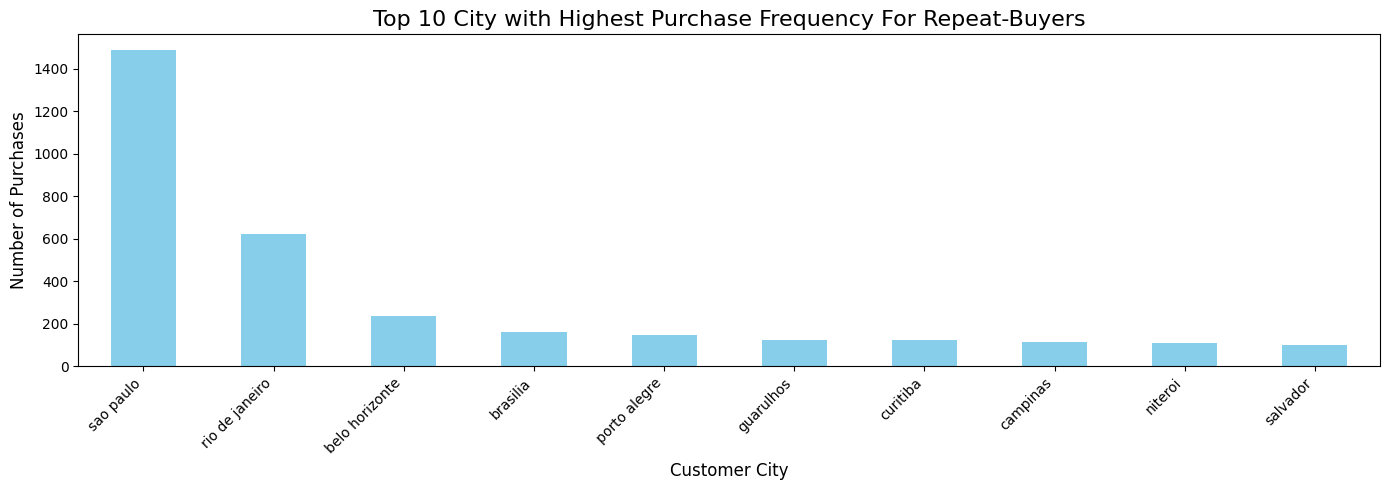

In [15]:
repeat_purchase_by_city = repeat_customers['customer_city'].value_counts().head(10) 

plt.figure(figsize=(14, 5))
repeat_purchase_by_city.plot(kind='bar', color='skyblue')

plt.title('Top 10 City with Highest Purchase Frequency For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

summary between 4.3.1 and 4.3.2 :

- City where the Most Purchase Frequency by customers distributed is from sao paolo even for first time buyers or repeat buyers. both has the similiar purchase frequency distribution

    4.3.3 Product Frequency Distribution By Seller City

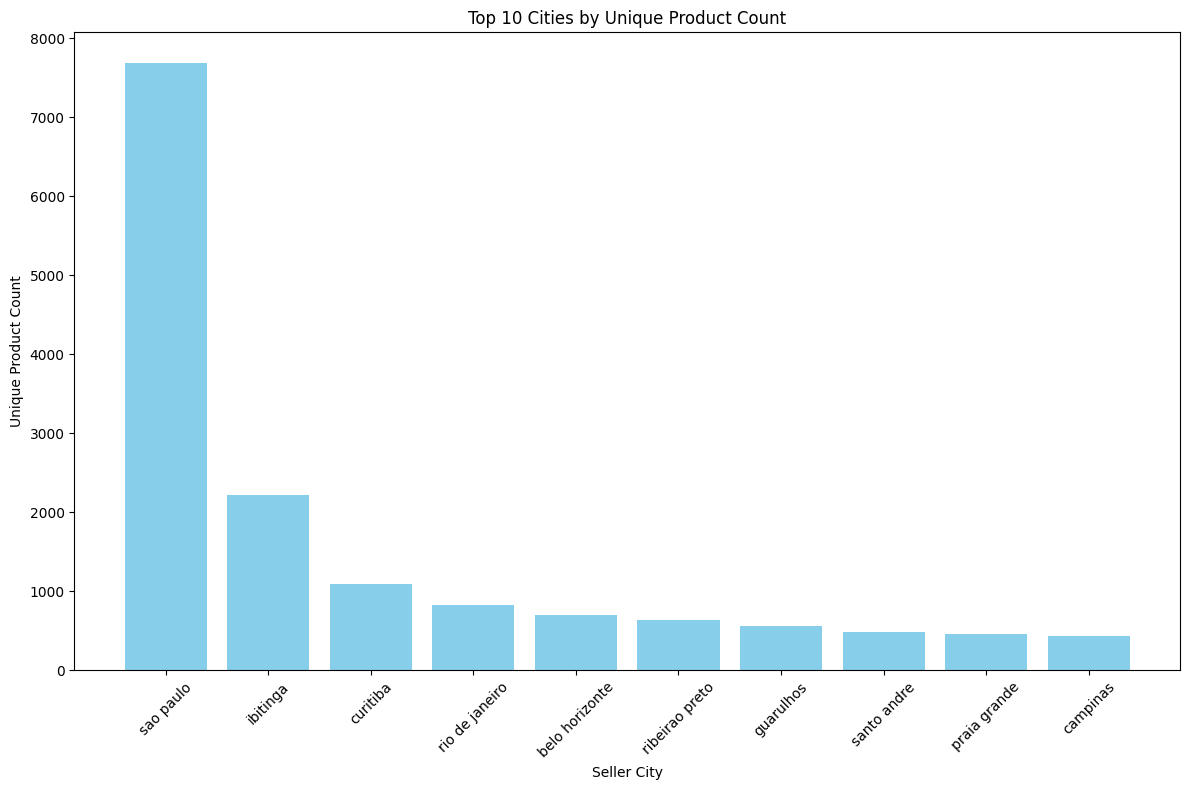

In [16]:
# Group by 'seller_city' and count unique 'product_id' values
city_product_counts = df_olist.groupby('seller_city')['product_id'].nunique().reset_index()

# Rename columns for clarity
city_product_counts.columns = ['Seller City', 'Unique Product Count']

# Sort by 'Unique Product Count' in descending order
city_product_counts_sorted = city_product_counts.sort_values(by='Unique Product Count', ascending=False)

# Get the top 10 cities
top_10_cities = city_product_counts_sorted.head(10)

# Plot the top 10 cities with unique product counts
plt.figure(figsize=(12, 8))
plt.bar(top_10_cities['Seller City'], top_10_cities['Unique Product Count'], color='skyblue')
plt.xlabel('Seller City')
plt.ylabel('Unique Product Count')
plt.title('Top 10 Cities by Unique Product Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Products that originate from São Paulo are the most frequently sold on the e-commerce platform. This is related to the high frequency of purchases of items from that city.

- Meanwhile, Ibitinga and Curitiba rank second and third in terms of products that originate from these cities but are not sold as frequently. These two cities are not among the top cities with the highest purchase frequency. Further analysis may be needed to understand the reasons behind this, based on average purchase values and customer satisfaction scores for products from these cities.

##### **4.4. Customer Purchase Frequency Based On Customer State**

This analysis aims to calculate the frequency of purchases made by customers based on their state. The goal is to understand how purchase frequency varies across different states and to determine if there are any patterns or correlations related to customer behavior or other influencing factors.

    4.4.1 First-Buyers Purchase Frequency Based On Customer State 

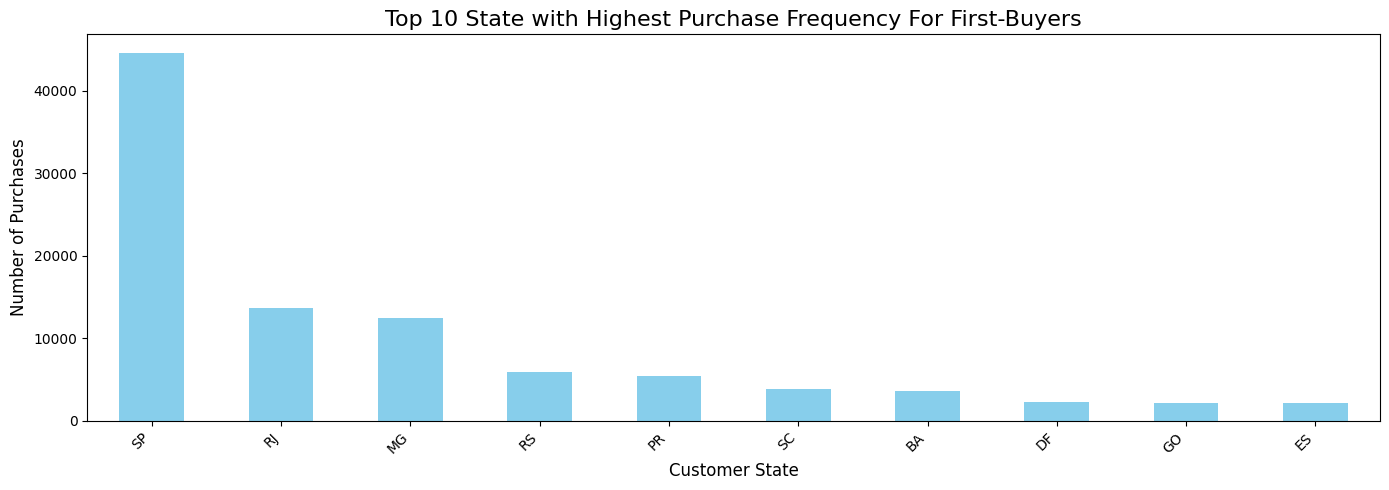

In [17]:
first_purchase_by_state = first_customers['customer_state'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
first_purchase_by_state.plot(kind='bar', color='skyblue')

plt.title('Top 10 State with Highest Purchase Frequency For First-Buyers', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

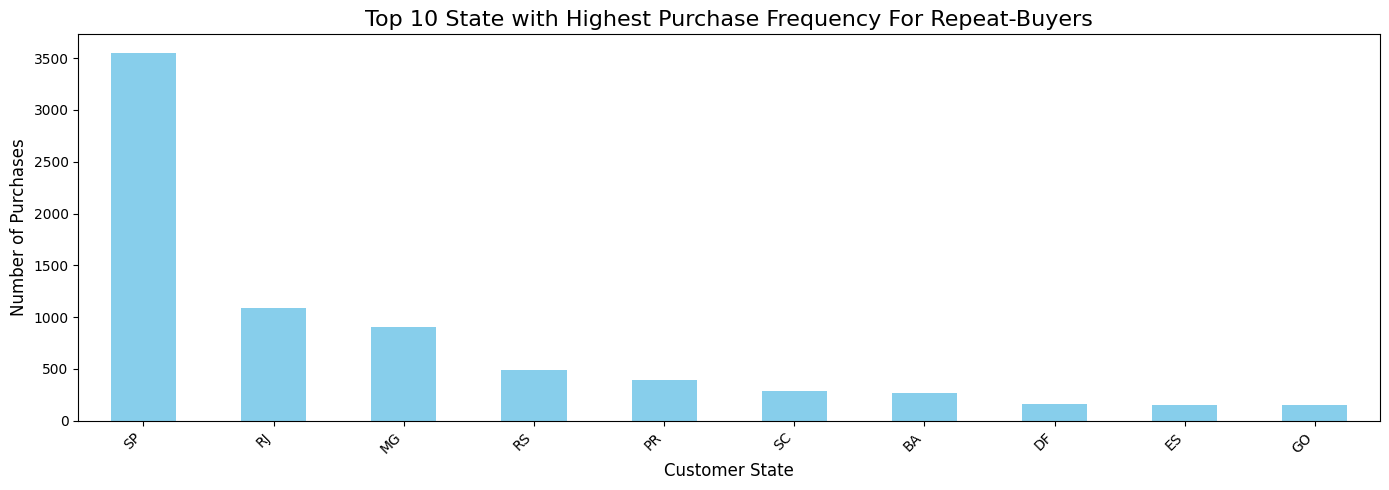

In [18]:
repeat_purchase_by_state = repeat_customers['customer_state'].value_counts().head(10)  # Menampilkan 10 kota teratas

plt.figure(figsize=(14, 5))
repeat_purchase_by_state.plot(kind='bar', color='skyblue')

plt.title('Top 10 State with Highest Purchase Frequency For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

summary insight between 4.4.1 and 4.4.2 :

- State where the Most Purchase Frequency by customers distributed is from sao paolo even for first time buyers or repeat buyers. both has the similiar purchase frequency distribution

#### **4.5. Customer Distribution Based On State**



This analysis aims to calculate the distribution of customers based on their state. The goal is to examine how this distribution relates to the frequency of purchases and whether it is influenced by any specific factors.

    4.5.1. First-Buyers Customer Distribution

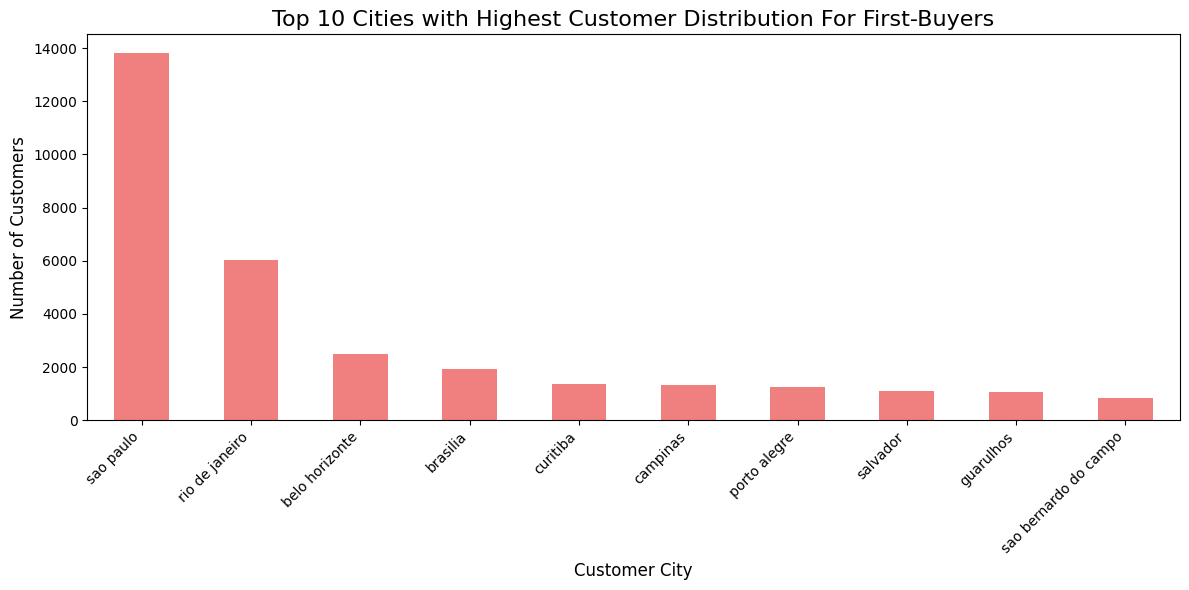

In [19]:
city_customer_counts = first_customers.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')

# Menambahkan judul dan label
plt.title('Top 10 Cities with Highest Customer Distribution For First-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Memutar label kota di sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


    4.5.2. Repeat Buyers Customer Distribution

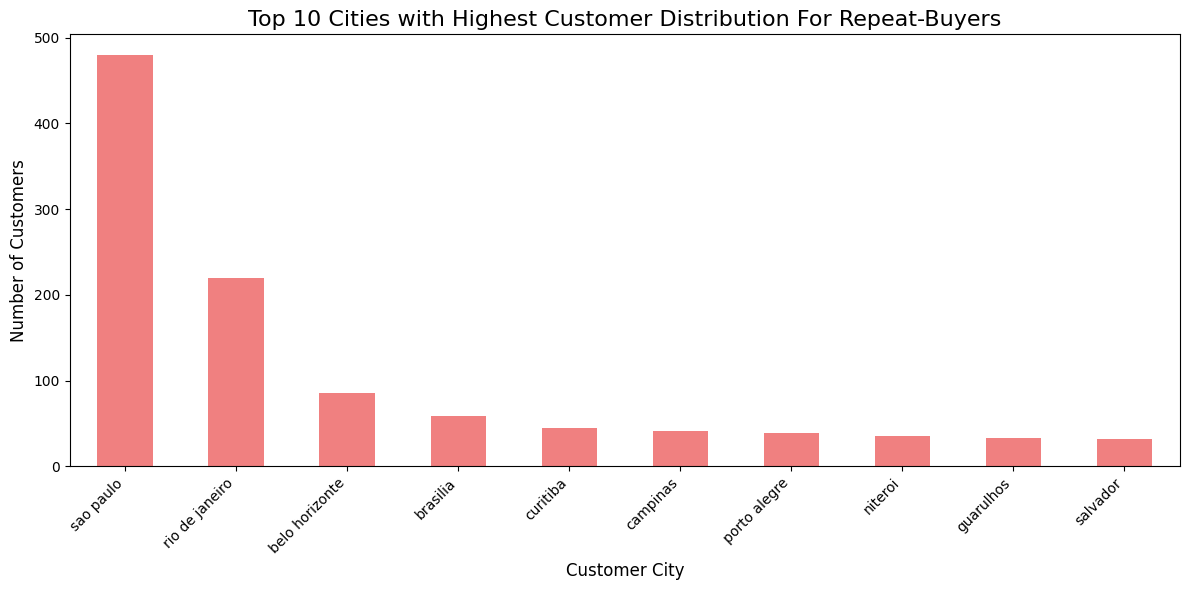

In [20]:
city_customer_counts = repeat_customers.groupby('customer_city')['customer_unique_id'].nunique()

top_10_city_customer_counts = city_customer_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_city_customer_counts.plot(kind='bar', color='lightcoral')

# Menambahkan judul dan label
plt.title('Top 10 Cities with Highest Customer Distribution For Repeat-Buyers', fontsize=16)
plt.xlabel('Customer City', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Memutar label kota di sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


Summary Insight between 4.5.1, 4.5.2, 4.3.1 and 4.3.2
- The majority of buyers, both first-time and repeat buyers, are from São Paulo, followed by Rio de Janeiro.

- The distribution of buyers shows a linear relationship with the frequency of purchases, which is also dominated by São Paulo.

##### **4.6. Customer Purchase Review Score**

This analysis aims to evaluate the average review scores given by customers based on their purchase activities. The goal is to understand how review scores vary across different products, categories, or customer segments and identify any patterns or trends in customer satisfaction.

    4.6.1. First-Buyers Purchase Review Score

C:\Users\user\AppData\Local\Temp\ipykernel_9280\182017659.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')


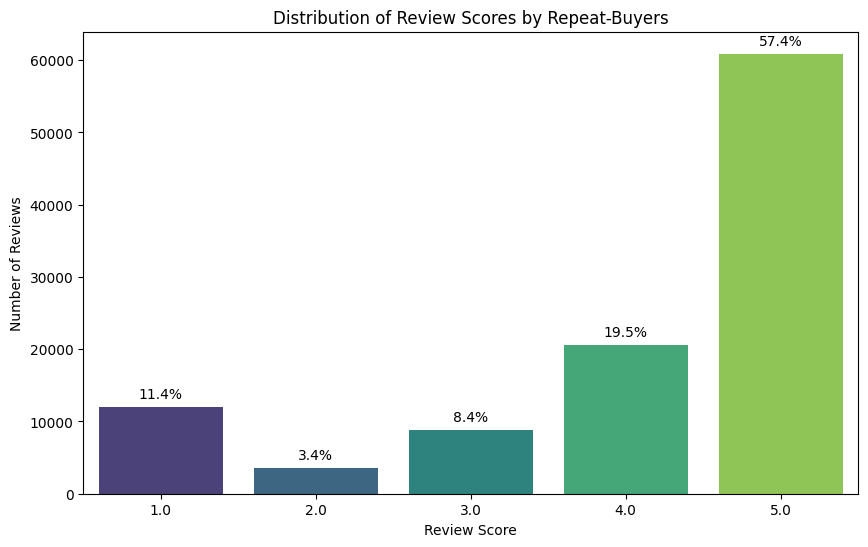

,review_score,count,Percent
0,5.0,60901,57.430476
1,4.0,20646,19.469461
2,1.0,12049,11.362372
3,3.0,8887,8.380563
4,2.0,3560,3.357129


In [21]:
review_counts = first_customers['review_score'].value_counts().reset_index()

total_reviews = review_counts['count'].sum()

# Calculate percentages
review_counts['Percent'] = (review_counts['count'] / total_reviews) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')

# Add percentage annotations to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_reviews) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribution of Review Scores by Repeat-Buyers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

review_counts


    4.6.2. Repeat-Buyers Purchase Review Score

C:\Users\user\AppData\Local\Temp\ipykernel_9280\1584415937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')


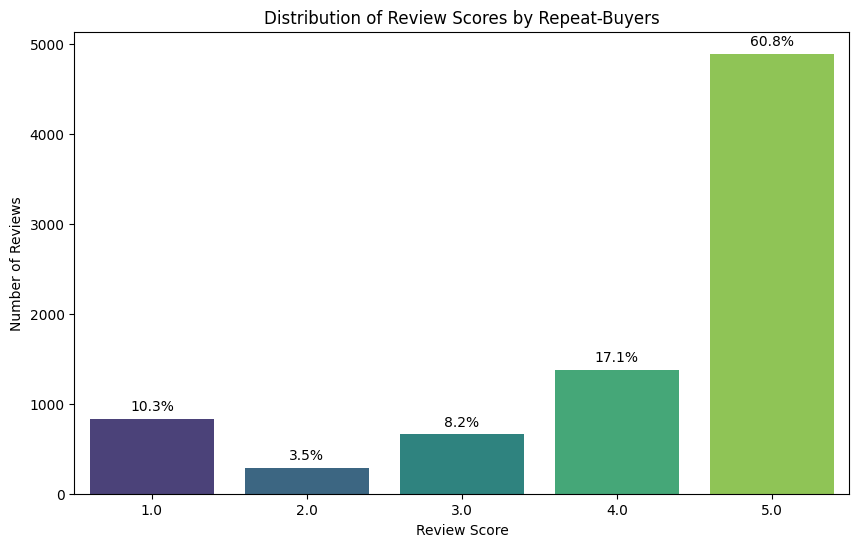

,review_score,count,Percent
0,5.0,4890,60.805770
1,4.0,1379,17.147476
2,1.0,832,10.345685
3,3.0,659,8.194479
4,2.0,282,3.506590


In [22]:
review_counts = repeat_customers['review_score'].value_counts().reset_index()

total_reviews = review_counts['count'].sum()

# Calculate percentages
review_counts['Percent'] = (review_counts['count'] / total_reviews) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='review_score', y='count', data=review_counts, palette='viridis')

# Add percentage annotations to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_reviews) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center',
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribution of Review Scores by Repeat-Buyers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

review_counts


Summary insight between 4.6.1 & 4.6.2 :
- Repeat buyers tend to give slightly higher review scores compared to first-time buyers, indicating a higher level of satisfaction with their repeat purchases.

- The distribution of review scores is relatively similar between first-time and repeat buyers, with a notable emphasis on high scores (5), suggesting overall positive customer experiences.

- he trend suggests that customers who make repeat purchases are slightly more satisfied, which could be indicative of improved customer satisfaction over time or a higher likelihood of returning for more positive experiences.


##### **4.7. Distribution of Customer Prefered Payment Type**

This analysis aims to determine the distribution of preferred payment types among customers. The goal is to understand which payment methods are most commonly used by customers and to identify any prevalent trends or preferences. By analyzing the distribution, businesses can gain insights into payment behavior, potentially influencing payment processing strategies and customer experience enhancements.

    4.7.1. First-buyers Payment-Type Distribution

payment_type
credit_card    78383
boleto         20662
voucher         5456
debit_card      1542
Name: count, dtype: int64

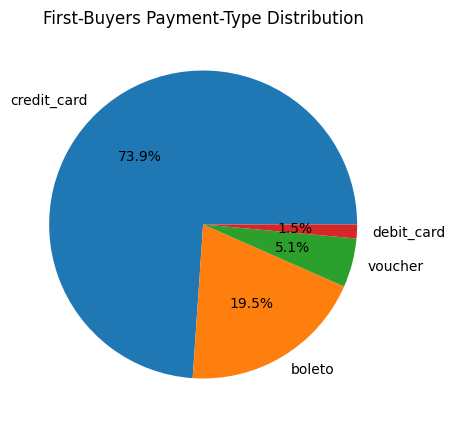

In [23]:
payment_type_counts = first_customers['payment_type'].value_counts()
display(payment_type_counts)

# Buat pie chart
plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('First-Buyers Payment-Type Distribution')
plt.show()


    4.7.2. Repeat-Buyers Payment-Type Distribution

payment_type
credit_card    5797
boleto         1541
voucher         612
debit_card       92
Name: count, dtype: int64

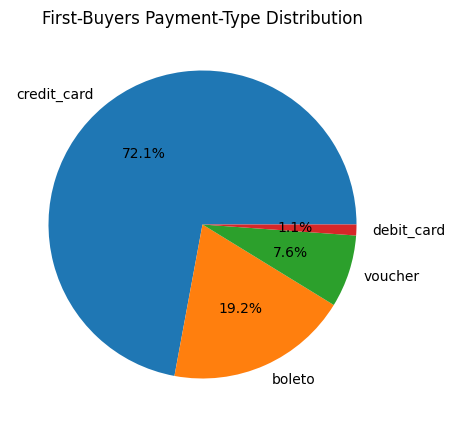

In [24]:
payment_type_counts = repeat_customers['payment_type'].value_counts()
display(payment_type_counts)

# Buat pie chart
plt.figure(figsize=(8, 5))
plt.pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('First-Buyers Payment-Type Distribution')
plt.show()


Summary insight between 4.7.1 & 4.7.2 :

- For first-time buyers, the credit card is the most popular payment method, accounting for the majority of transactions. Boleto and vouchers follow, while debit cards are used less frequently.

- Among repeat buyers, credit cards remain the most preferred payment method, with a significant proportion compared to other payment types. Boleto is still a common choice but shows a decrease in proportion compared to first-time buyers. Vouchers and debit cards have lower usage rates among repeat buyers.

##### **4.8. Distribution of Customer Prefered Payment-Installment**

    4.8.1. First-Buyers Payment-Installment Distribution

,payment_installments,count
0,1.0,52983
1,2.0,12484
2,3.0,10651
3,4.0,7238
4,10.0,6009


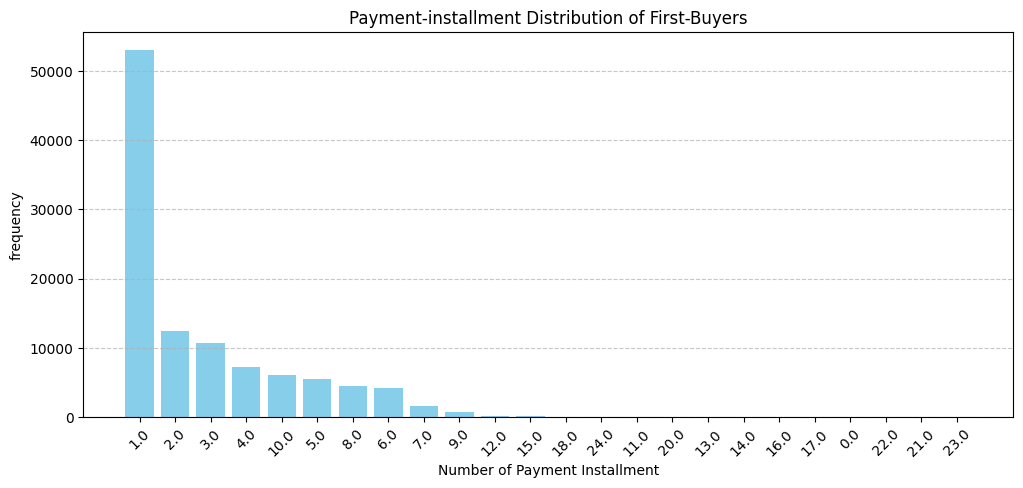

In [25]:
payment_installments_counts = first_customers['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  
payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)


display(payment_installments_counts.head(5))

plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Payment-installment Distribution of First-Buyers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


    4.8.2. Repeat-Buyers Payment-Installment Distribution

,payment_installments,count
0,1.0,3843
1,2.0,757
2,3.0,753
3,10.0,697
4,4.0,519


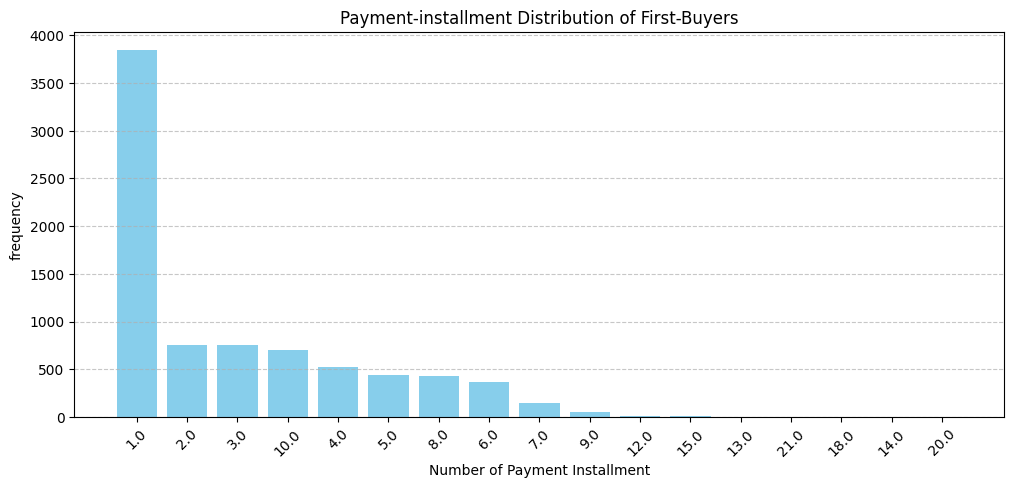

In [26]:
payment_installments_counts = repeat_customers['payment_installments'].value_counts().reset_index()
payment_installments_counts.columns = ['payment_installments', 'count']  # Ganti nama kolom untuk kemudahan

payment_installments_counts = payment_installments_counts.sort_values(by='count', ascending=False)

display(payment_installments_counts.head(5))

plt.figure(figsize=(12, 5))
plt.bar(payment_installments_counts['payment_installments'].astype(str), payment_installments_counts['count'], color='skyblue')
plt.xlabel('Number of Payment Installment')
plt.ylabel('frequency')
plt.title('Payment-installment Distribution of First-Buyers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Summary Insight between 4.8.1 & 4.8.2
- Preference Trends: Both first-time and repeat buyers predominantly prefer single payments. However, the inclination towards longer installment plans increases among repeat buyers, possibly reflecting a shift towards more flexible payment options with continued patronage.

- Payment Flexibility: The data indicates that while single payments are most popular, a notable portion of both buyer groups opt for extended payment plans. This suggests that providing a variety of installment options could cater to different customer preferences and enhance satisfaction.

##### **4.9. Customer Purchase Frequency By Time**

This analysis aims to examine the frequency of customer purchases based on different time periods. The goal is to understand purchasing behavior over various time frames, such as by day of the week, month, or year. By analyzing these patterns, we can identify trends and peak times for purchases, which can help in optimizing marketing strategies, managing inventory, and improving overall customer experience. The insights derived from this analysis will assist in recognizing any temporal patterns in customer buying habits, which can inform business decisions and strategic planning.

    4.9.1. Montly Purchase Frequency From 2016 - 2018

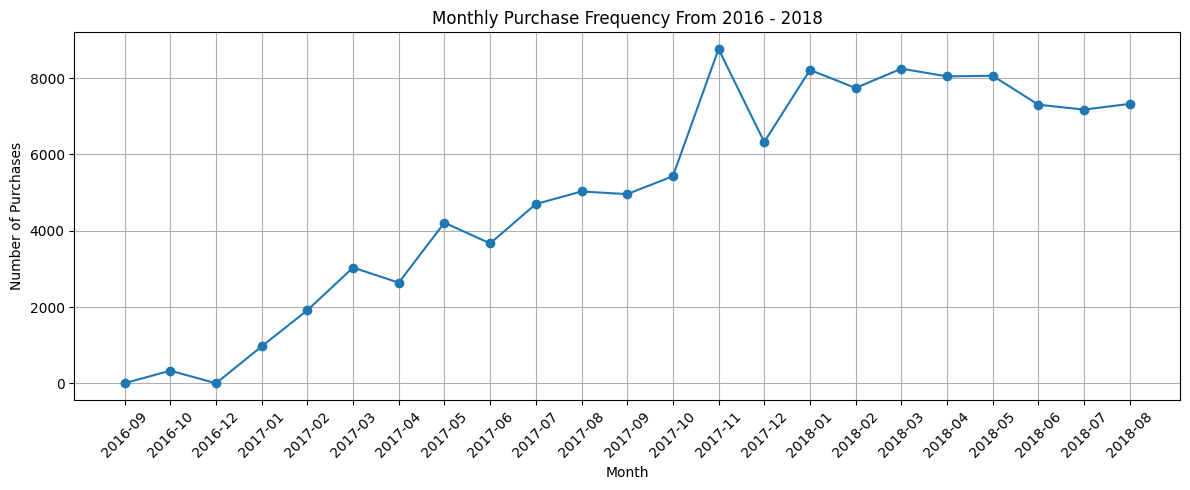

In [27]:
monthly_purchase = df_olist.copy()

monthly_purchase['order_purchase_timestamp'] = pd.to_datetime(monthly_purchase['order_purchase_timestamp'])

monthly_purchase['purchase_month'] = monthly_purchase['order_purchase_timestamp'].dt.to_period('M')

monthly_orders = monthly_purchase.groupby('purchase_month').size().reset_index(name='order_count')

plt.figure(figsize=(12, 5))
plt.plot(monthly_orders['purchase_month'].astype(str), monthly_orders['order_count'], marker='o', linestyle='-')
plt.title('Monthly Purchase Frequency From 2016 - 2018')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


    4.9.2 Daily Purchace Frequency From 2016 - 2018

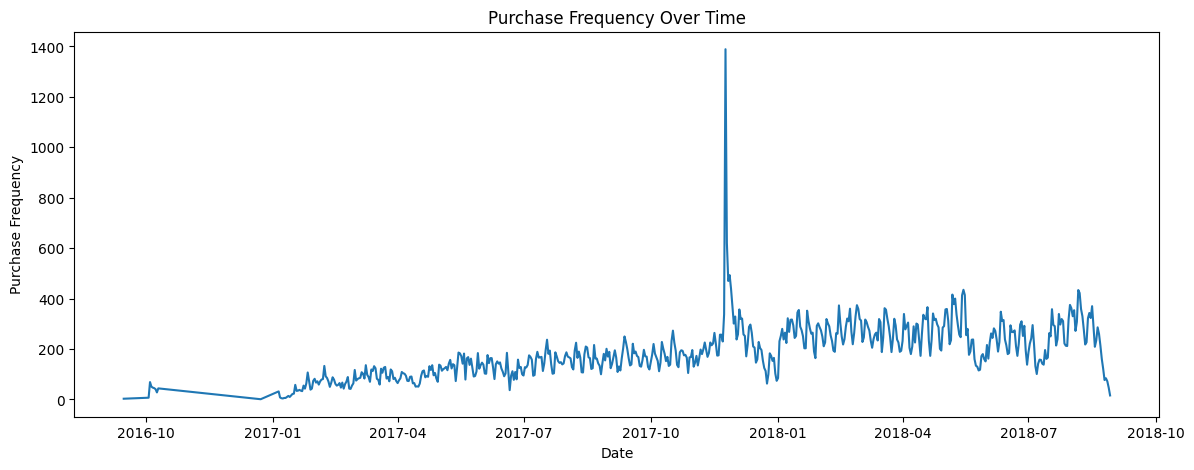

In [28]:
daily_purchase = df_olist.copy()

daily_purchase['order_purchase_timestamp'] = pd.to_datetime(daily_purchase['order_purchase_timestamp'])

daily_purchase['order_purchase_timestamp'] = daily_purchase['order_purchase_timestamp'].dt.date

daily_frequency = daily_purchase.groupby('order_purchase_timestamp').size()

plt.figure(figsize=(14,5))
daily_frequency.plot()
plt.title('Purchase Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Purchase Frequency')
plt.show()

    4.9.3 Average Purchase Frequency by Days

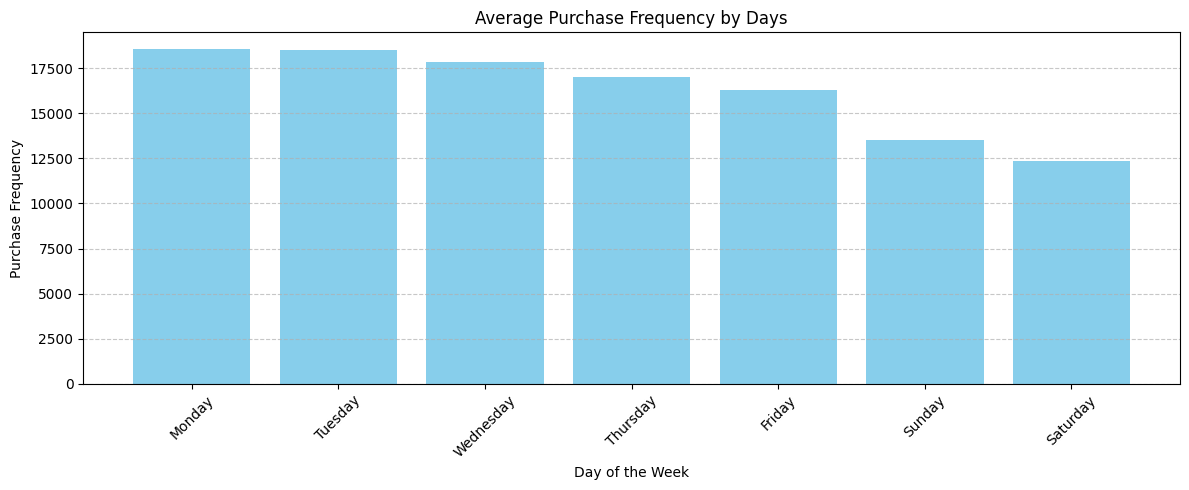

In [29]:
average_weekday_purchase = df_olist.copy()

average_weekday_purchase['order_purchase_timestamp'] = pd.to_datetime(average_weekday_purchase['order_purchase_timestamp'])

average_weekday_purchase['order_purchase_day'] = average_weekday_purchase['order_purchase_timestamp'].dt.day_name()

weekday_frequency = average_weekday_purchase.groupby('order_purchase_day').size().reset_index(name='order_count')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_frequency['order_purchase_day'] = pd.Categorical(weekday_frequency['order_purchase_day'], categories=weekday_order, ordered=True)

weekday_frequency = weekday_frequency.sort_values(by='order_count', ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(weekday_frequency['order_purchase_day'], weekday_frequency['order_count'], color='skyblue')
plt.title('Average Purchase Frequency by Days')
plt.xlabel('Day of the Week')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Summary Insight :
- Monday and Tuesday are the days with the highest number of orders, with 18,547 and 18,514 orders respectively. This indicates that the week begins with high order volumes, possibly because customers make purchases after the weekend or start the week with shopping.

- Saturday has the lowest number of orders with 12,321 orders. This may be due to weekend activities diverting customers' attention away from online shopping.

    4.9.4 Average Purchase Frequency by Hours


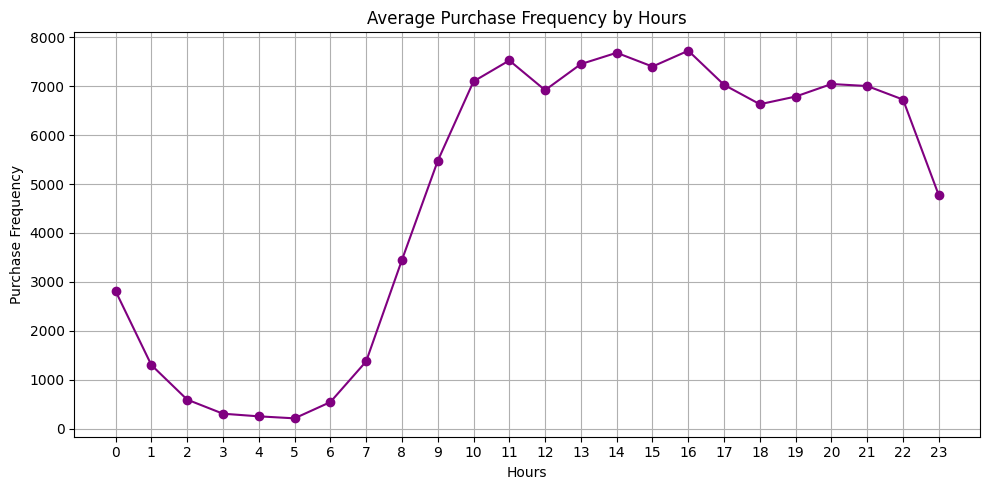

In [30]:
average_hour_purchase = df_olist.copy()

average_hour_purchase['order_purchase_timestamp'] = pd.to_datetime(average_hour_purchase['order_purchase_timestamp'])

average_hour_purchase['purchase_hour'] = average_hour_purchase['order_purchase_timestamp'].dt.hour

hourly_frequency = average_hour_purchase.groupby('purchase_hour').size().reset_index(name='order_count')

plt.figure(figsize=(10, 5))
plt.plot(hourly_frequency['purchase_hour'], hourly_frequency['order_count'], marker='o', linestyle='-', color='purple')
plt.title('Average Purchase Frequency by Hours')
plt.xlabel('Hours')
plt.ylabel('Purchase Frequency')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

Summary Insight :
1. Hours with the Highest Number of Orders:

    - 4 PM (16:00 - 16:59) has the highest number of orders with 7,723 orders. This indicates that customers tend to make purchases in the late afternoon.

    - 2 PM (14:00 - 14:59) also shows high order volume with 7,678 orders, suggesting increased shopping activity in the late afternoon, approaching the end of the workday.

2. Hours with the Lowest Number of Orders:

    - 4 AM (04:00 - 04:59) has the lowest number of orders with 250 orders. This indicates that online shopping is relatively low during the early morning hours.

    4.9.5 Distribution of Repeat-Buyers Purchase Periods 


In [31]:
customer_repeat_purchase = repeat_customers.copy()

customer_repeat_purchase ['order_purchase_timestamp'] = pd.to_datetime(customer_repeat_purchase ['order_purchase_timestamp'])

customer_repeat_purchase = customer_repeat_purchase.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

customer_repeat_purchase['previous_purchase'] = customer_repeat_purchase.groupby('customer_unique_id')['order_purchase_timestamp'].shift(1)

customer_repeat_purchase['time_difference'] = (customer_repeat_purchase['order_purchase_timestamp'] - customer_repeat_purchase['previous_purchase']).dt.days

customer_repeat_purchase = customer_repeat_purchase.dropna(subset=['time_difference'])

customer_repeat_purchase[['customer_unique_id', 'order_purchase_timestamp', 'previous_purchase', 'time_difference']].sort_values(by='time_difference', ascending=False).head(5)

,customer_unique_id,order_purchase_timestamp,previous_purchase,time_difference
2313,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12,2016-10-06 19:33:34,608.0
85044,d8f3c4f441a9b59a29f977df16724f38,2018-08-24 17:52:59,2017-01-18 21:08:18,582.0
88385,94e5ea5a8c1bf546db2739673060c43f,2018-05-09 13:49:19,2016-10-05 21:10:56,580.0
65894,87b3f231705783eb2217e25851c0a45d,2018-05-04 11:14:37,2016-10-08 18:45:34,572.0
22749,4e23e1826902ec9f208e8cc61329b494,2018-03-13 22:28:21,2016-10-05 12:32:55,524.0


In [32]:
def categorize_time_difference(days):
    if days <= 7:
        return '1 Minggu'
    elif days <= 14:
        return '2 Minggu'
    elif days <= 30:
        return '1 Bulan'
    elif days <= 60:
        return '2 Bulan'
    elif days <= 90:
        return '3 Bulan'
    else:
        return 'Lebih dari 3 Bulan'

customer_repeat_purchase['time_category'] = customer_repeat_purchase['time_difference'].apply(categorize_time_difference)

time_distribution = customer_repeat_purchase['time_category'].value_counts().reset_index()

time_distribution.columns = ['time_category', 'count']

C:\Users\user\AppData\Local\Temp\ipykernel_9280\1378412912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_category', y='count', data=time_distribution, palette='viridis')


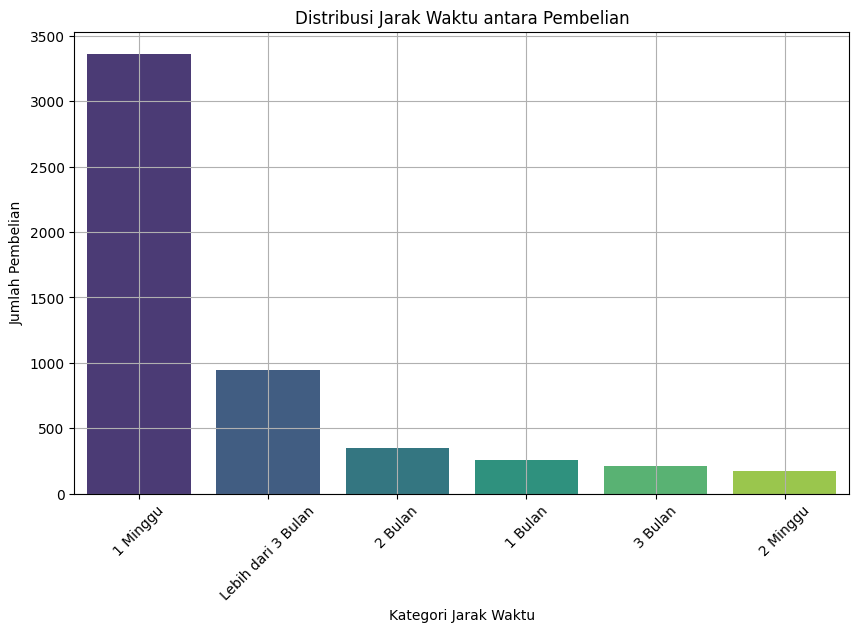

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_category', y='count', data=time_distribution, palette='viridis')
plt.title('Distribusi Jarak Waktu antara Pembelian')
plt.xlabel('Kategori Jarak Waktu')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Summary Insight :
- Weekly Purchases: The majority of repeat buyers, 3,363 (a significant proportion), make purchases every week. This indicates that these customers have a high frequency of buying behavior.

- Purchases Every 1 to 3 Months: A smaller segment of repeat buyers, with 944 making purchases more than 3 months apart and 351 making purchases every 2 months, reflects a lower but still notable frequency of repeat buying.

- Less Frequent Purchases: Purchases occurring every 1 month and 3 months are less common, with 254 and 214 repeat buyers respectively. This suggests that these customers might have less frequent, but still regular, purchasing patterns.

- Two Weeks Purchases: The least common interval is every 2 weeks, with 174 repeat buyers. This is the smallest group, showing that very short-term repeat purchases are less frequent among repeat buyers.

In [36]:
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'], format='mixed')
df_olist['order_estimated_delivery_date'] = pd.to_datetime(df_olist['order_estimated_delivery_date'], format='mixed')

# Satisfaction by Product Category
category_satisfaction = df_olist.groupby('product_category_name')['review_score'].mean().sort_values().head(10)

# Satisfaction by Seller
seller_satisfaction = df_olist.groupby('seller_id')['review_score'].mean().sort_values().head(10)

# Satisfaction by Delivery Performance (On-Time or Late)
df_olist['delivery_days'] = (df_olist['order_delivered_customer_date'] - df_olist['order_estimated_delivery_date']).dt.days
df_olist['on_time_delivery'] = df_olist['delivery_days'] <= 0
delivery_performance_satisfaction = df_olist.groupby('on_time_delivery')['review_score'].mean()


In [37]:
delivery_performance_satisfaction

on_time_delivery
False    2.317204
True     4.210399
Name: review_score, dtype: float64

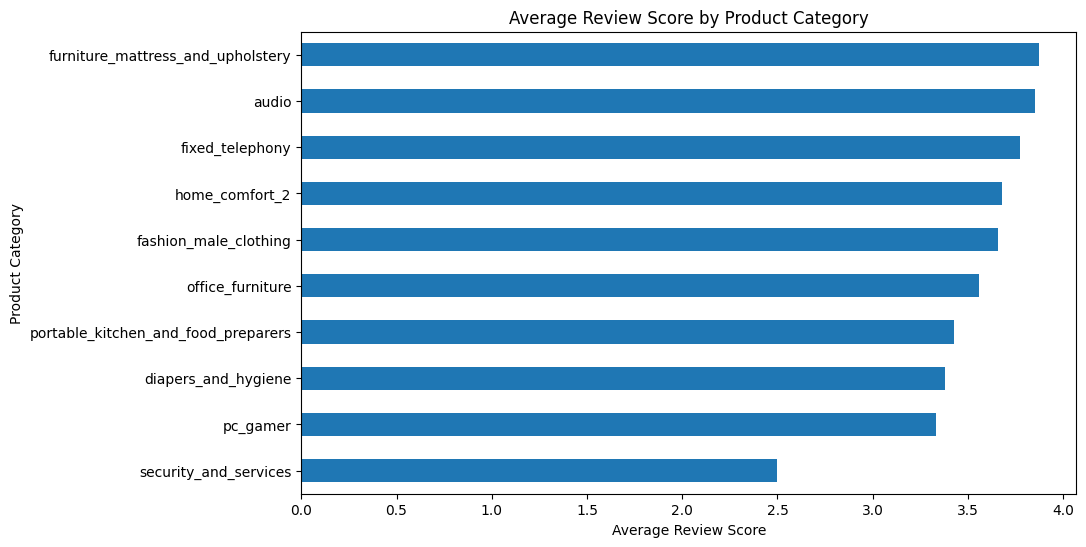

In [38]:
category_satisfaction.plot(kind='barh', title='Average Review Score by Product Category', figsize=(10, 6))
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

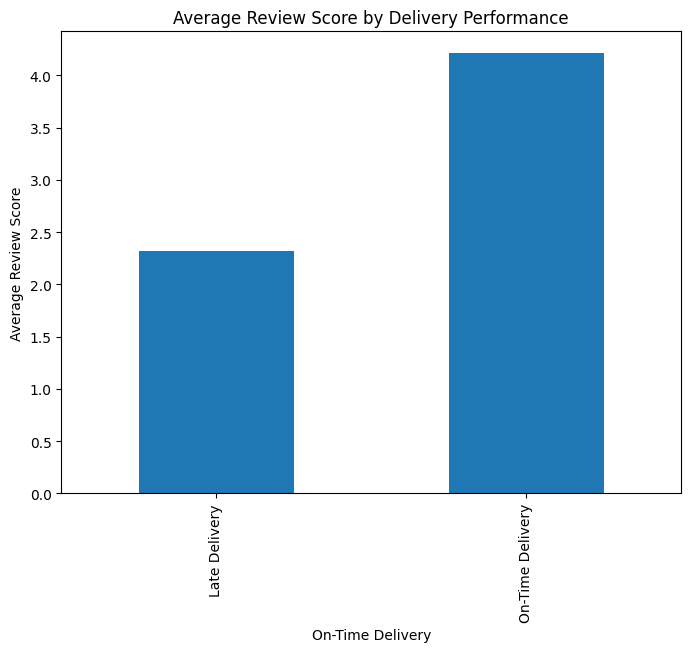

In [41]:
delivery_performance_satisfaction.plot(kind='bar', title='Average Review Score by Delivery Performance', figsize=(8, 6))
plt.xlabel('On-Time Delivery')
plt.ylabel('Average Review Score')
plt.xticks([0, 1], ['Late Delivery', 'On-Time Delivery'])
plt.show()



In [43]:
correlation = df_olist[['review_score', 'delivery_days']].corr().iloc[0, 1]
print(f"Correlation between Review Score and Delivery Days: {correlation}")


Correlation between Review Score and Delivery Days: -0.22406506865281844


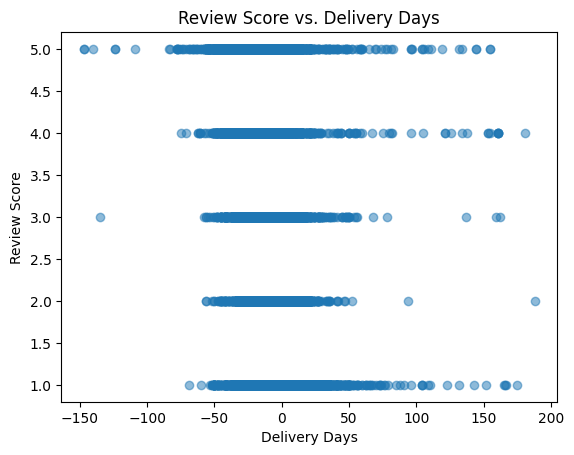

In [44]:
plt.scatter(df_olist['delivery_days'], df_olist['review_score'], alpha=0.5)
plt.title('Review Score vs. Delivery Days')
plt.xlabel('Delivery Days')
plt.ylabel('Review Score')
plt.show()

In [45]:
low_score_reviews = df_olist[df_olist['review_score'] < 3]
# Analyzing low scores by product category or seller
low_score_by_category = low_score_reviews['product_category_name'].value_counts()
low_score_by_seller = low_score_reviews['seller_id'].value_counts()


In [46]:
review_time_satisfaction.plot(kind='line', title='Review Time vs. Review Score', figsize=(10, 6))
plt.xlabel('Days After Delivery')
plt.ylabel('Average Review Score')
plt.show()


TypeError: cannot subtract DatetimeArray from ndarray